In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#loading CIFAR 10 dataset and splitting it into training and testing set.

((trainX, trainY), (testX, testY)) = cifar10.load_data()

#normalizing values to be between 0 and 1
trainX = trainX.astype("float")/255.0
testX = testX.astype("float")/255.0

#flattning the features to make them ready for use in Dense layer
trainX= trainX.reshape((trainX.shape[0], 3072))
testX= testX.reshape((testX.shape[0], 3072))

In [4]:
#convertinf the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

#initializing the label names for CIFAR-10 dataset

labelNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
              'frog', 'horse', 'ship', 'truck']

In [5]:
#defining the model architecture
model = Sequential()
model.add(Dense(1024, input_shape = (3072,), activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
#Defining SGD with learning rate 0.01 compiling and fitting model
sgd = SGD(0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])
H = model.fit(trainX, trainY, validation_data = (testX, testY), epochs = 100, batch_size = 32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 20s 406us/sample - loss: 1.8371 - acc: 0.3449 - val_loss: 1.7594 - val_acc: 0.3695
Epoch 2/100
50000/50000 [==============================] - 20s 394us/sample - loss: 1.6504 - acc: 0.4158 - val_loss: 1.6366 - val_acc: 0.4114
Epoch 3/100
50000/50000 [==============================] - 19s 386us/sample - loss: 1.5670 - acc: 0.4477 - val_loss: 1.5641 - val_acc: 0.4496
Epoch 4/100
50000/50000 [==============================] - 19s 375us/sample - loss: 1.5109 - acc: 0.4667 - val_loss: 1.5182 - val_acc: 0.4618
Epoch 5/100
50000/50000 [==============================] - 20s 391us/sample - loss: 1.4615 - acc: 0.4850 - val_loss: 1.4840 - val_acc: 0.4749
Epoch 6/100
50000/50000 [==============================] - 20s 393us/sample - loss: 1.4210 - acc: 0.4999 - val_loss: 1.4912 - val_acc: 0.4556
Epoch 7/100
50000/50000 [==============================] - 19s 381us/sample - loss: 1.3830 - acc: 

50000/50000 [==============================] - 5s 99us/sample - loss: 0.3268 - acc: 0.8950 - val_loss: 1.6404 - val_acc: 0.5496
Epoch 59/100
50000/50000 [==============================] - 5s 99us/sample - loss: 0.3116 - acc: 0.9014 - val_loss: 1.6774 - val_acc: 0.5510
Epoch 60/100
50000/50000 [==============================] - 5s 99us/sample - loss: 0.2987 - acc: 0.9057 - val_loss: 1.6837 - val_acc: 0.5516
Epoch 61/100
50000/50000 [==============================] - 5s 99us/sample - loss: 0.2853 - acc: 0.9110 - val_loss: 1.7161 - val_acc: 0.5508
Epoch 62/100
50000/50000 [==============================] - 5s 100us/sample - loss: 0.2656 - acc: 0.9195 - val_loss: 1.7449 - val_acc: 0.5633
Epoch 63/100
50000/50000 [==============================] - 5s 100us/sample - loss: 0.2575 - acc: 0.9222 - val_loss: 1.7364 - val_acc: 0.5533
Epoch 64/100
50000/50000 [==============================] - 5s 99us/sample - loss: 0.2478 - acc: 0.9248 - val_loss: 1.8028 - val_acc: 0.5483
Epoch 65/100
50000/50000

In [7]:
#evaluating the network
predictions = model.predict(testX, batch_size = 32)
print(classification_report(testY.argmax(axis = 1), predictions.argmax(axis = 1), target_names = labelNames))

              precision    recall  f1-score   support

    airplane       0.58      0.69      0.63      1000
  automobile       0.70      0.64      0.67      1000
        bird       0.45      0.48      0.47      1000
         cat       0.40      0.36      0.38      1000
        deer       0.51      0.48      0.50      1000
         dog       0.50      0.47      0.48      1000
        frog       0.61      0.63      0.62      1000
       horse       0.65      0.60      0.63      1000
        ship       0.71      0.68      0.69      1000
       truck       0.57      0.63      0.60      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000



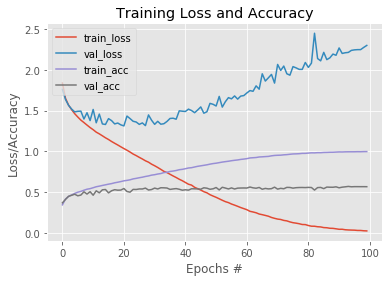

In [8]:
#plotting training loss and accuracy
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, 100), H.history['loss'], label = 'train_loss')
plt.plot(np.arange(0, 100), H.history['val_loss'], label = 'val_loss')
plt.plot(np.arange(0, 100), H.history['acc'], label = 'train_acc')
plt.plot(np.arange(0, 100), H.history['val_acc'], label = 'val_acc')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs #')
plt.ylabel('Loss/Accuracy')
plt.legend()